In [46]:
import pandas as pd 
import re 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


warnings.simplefilter('ignore')

In [50]:
import pandas as pd 

df=pd.read_excel('Coffee_shop_data.xlsx')
population=pd.read_csv('population.csv', skiprows=[0])

ParserError: Error tokenizing data. C error: Expected 2 fields in line 27, saw 3


In [48]:
population.head() #Checking first five rows

,1,Brew Haven,8 Old Shore Place,Oakland,California,Zip Code,415-810-4769,4.50,Male,"$72,463",$3.31,CoffeeShopCount
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,"$87,117",$5.35,4
1,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,"$86,394",$4.15,4
2,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,"$88,343",$5.34,7
3,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,"$77,795",$4.51,9
4,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.2,Female,"$78,753",$5.32,7


In [49]:
population = pd.read_csv('population.csv' ,sep='\t')
print (population.head())

   ID no.   Business Name           Street address       City       State  \
0       1      Brew Haven        8 Old Shore Place    Oakland  California   
1       2      Bean Bliss  6650 Clarendon Crossing   Stockton  California   
2       3   Caffeine Cove          7281 Buell Road     Fresno  California   
3       4       Mug Magic       670 Jackson Avenue   Torrance  California   
4       5     Daily Grind     37 Ludington Terrace  San Diego  California   

   Zip Code         Phone  Rating Gender majority  Median Salary  Latte Price  
0     94616  415-810-4769     4.5            Male        $72,463        $3.31  
1     95210  209-701-1665     5.0          Female        $87,117        $5.35  
2     93773  559-137-3554     4.7            Male        $86,394        $4.15  
3     90510  818-789-5573     4.3            Male        $88,343        $5.34  
4     92196  619-354-2389     1.6            Male        $77,795        $4.51  


In [51]:
import pandas as pd

# Define column names
columns = [
    "ID", "Business Name", "Address", "City", "State", 
    "ZIP Code", "Phone", "Rating", "Gender", "Income", "Price"
]

# Load the CSV file
df = pd.read_csv('population.csv', sep='\t', header=None, names=columns)


In [52]:
df.head()#Checking first five rows 

,ID,Business Name,Address,City,State,ZIP Code,Phone,Rating,Gender,Income,Price
0,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
1,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.50,Male,"$72,463",$3.31
2,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,"$87,117",$5.35
3,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.70,Male,"$86,394",$4.15
4,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.30,Male,"$88,343",$5.34


In [53]:
df.info() #Checking for data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1001 non-null   object
 1   Business Name  1001 non-null   object
 2   Address        1001 non-null   object
 3   City           1001 non-null   object
 4   State          1001 non-null   object
 5   ZIP Code       1001 non-null   object
 6   Phone          1001 non-null   object
 7   Rating         1001 non-null   object
 8   Gender         1001 non-null   object
 9   Income         1001 non-null   object
 10  Price          1001 non-null   object
dtypes: object(11)
memory usage: 86.2+ KB


In [54]:
import pandas as pd 
df.shape #Check the number of records and features 

(1001, 11)

In [55]:
population.shape

(1000, 11)

In [56]:
df.describe

<bound method NDFrame.describe of           ID        Business Name                  Address            City  \
0     ID no.        Business Name           Street address            City   
1          1           Brew Haven        8 Old Shore Place         Oakland   
2          2           Bean Bliss  6650 Clarendon Crossing        Stockton   
3          3        Caffeine Cove          7281 Buell Road          Fresno   
4          4            Mug Magic       670 Jackson Avenue        Torrance   
...      ...                  ...                      ...             ...   
996      996        Sip & Stories       7 Mockingbird Park  San Bernardino   
997      997        Perk Paradise            8 Cody Street         Burbank   
998      998   Urban Brewtropolis        141 Burrows Place     Los Angeles   
999      999       Steamy Moments  42004 Bellgrove Terrace          Orange   
1000    1000   Caffeine Communion       783 Gateway Center        Pasadena   

           State  ZIP Code   

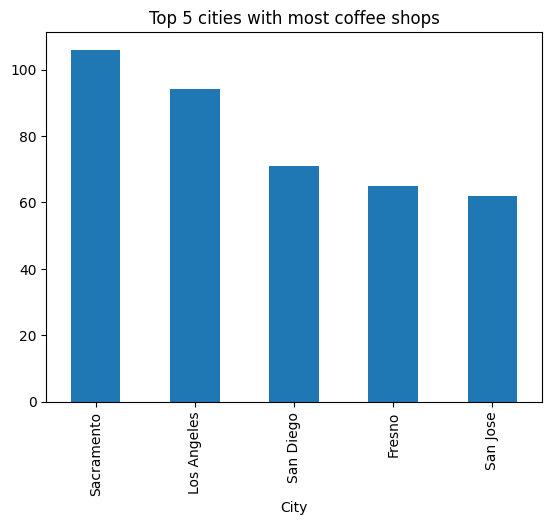

In [57]:
import matplotlib.pyplot as plt 
ax=df['City'].value_counts().head(5).plot(kind='bar')
ax.set_title('Top 5 cities with most coffee shops')
plt.show()

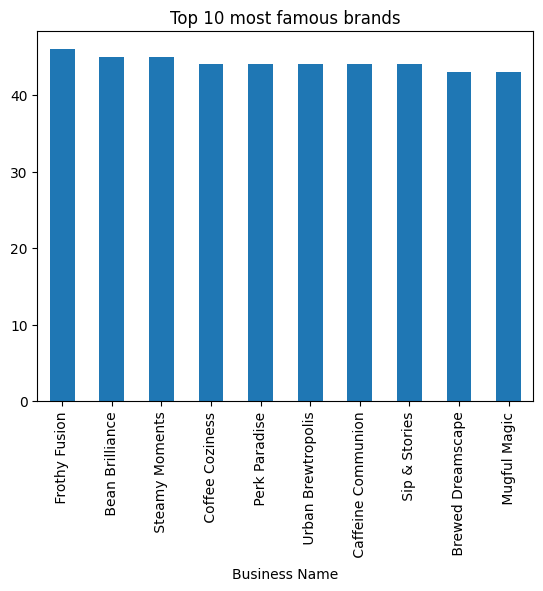

In [58]:
import matplotlib.pyplot as plt 
ax=df['Business Name'].value_counts().head(10).plot(kind ='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

In [59]:

df.isna().sum()

ID               0
Business Name    0
Address          0
City             0
State            0
ZIP Code         0
Phone            0
Rating           0
Gender           0
Income           0
Price            0
dtype: int64

In [60]:
print(df.columns)

Index(['ID', 'Business Name', 'Address', 'City', 'State', 'ZIP Code', 'Phone',
       'Rating', 'Gender', 'Income', 'Price'],
      dtype='object')


In [61]:
#Converting zipcode to object data (str) in order to join the zip code with the population data
df['ZIP Code']=df['ZIP Code'].astype(str)

In [62]:
#Extract zip code from population
#Getting the last 5digits from the population zip code.Creating a new column called zip code
def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match: 
        zip_code = match.group(0)
    return zip_code

In [63]:
import pandas as pd
import re

# Define column names
columns = [
    "ID", "Business Name", "Address", "City", "State", 
    "Geography", "Phone", "Rating", "Gender", "Income", "Price"
]

# Load the population data
population = pd.read_csv('population.csv', sep='\t', names=columns, header=None)

# Define the ZIP code extraction function
def find_zip_code(geography):
    match = re.search(r'\b\d{5}(?:-\d{4})?\b', str(geography))
    return match.group(0) if match else None

# Extract ZIP codes and add a new column
population['ZIP Code'] = population['Geography'].apply(find_zip_code)

# Check the updated DataFrame
print(population[['Geography', 'ZIP Code']].head())


  Geography ZIP Code
0  Zip Code     None
1     94616    94616
2     95210    95210
3     93773    93773
4     90510    90510


In [65]:
# The actual conversation is below. The above is the function 
import re  # Import the regular expressions module

population = pd.read_csv('population.csv', sep='\t', names=columns, header=None)


def find_zip_code(geocode):
    # Example regex pattern for a US ZIP code
    pattern = r'\b\d{5}(?:-\d{4})?\b'
    match = re.search(pattern, geocode)
    if match: 
        return match.group(0)  # Return the matched ZIP code
    return None  # Return None if no match is found

# Example usage:
population['Zip Code'] = population['Address'].apply(find_zip_code)


In [69]:
import pandas as pd

# Example cafe_data DataFrame
cafe_data = pd.DataFrame({
    'ZIP Code': ['94616', '95210', '93773'],
    'Business Name': ['Cafe A', 'Cafe B', 'Cafe C'],
    'Price': [3.5, 4.0, 4.5]
})

# Example population DataFrame
population = pd.DataFrame({
    'ZIP Code': ['94616', '95210', '93773'],
    'Population': [50000, 45000, 30000],
    'Median Salary': [72000, 68000, 65000]
})

# Ensure 'ZIP Code' is a string in both DataFrames
cafe_data['ZIP Code'] = cafe_data['ZIP Code'].astype(str)
population['ZIP Code'] = population['ZIP Code'].astype(str)

# Perform the merge
df = pd.merge(cafe_data, population, on='ZIP Code')

# Check the merged DataFrame
print(df)



  ZIP Code Business Name  Price  Population  Median Salary
0    94616        Cafe A    3.5       50000          72000
1    95210        Cafe B    4.0       45000          68000
2    93773        Cafe C    4.5       30000          65000


In [71]:
print(df.columns)


Index(['ZIP Code', 'Business Name', 'Price', 'Population', 'Median Salary'], dtype='object')


In [72]:
print(cafe_data.columns)


Index(['ZIP Code', 'Business Name', 'Price'], dtype='object')


In [73]:
columns = cafe_data.columns.values.tolist() + ['Population']  # Use the correct column name
df = df[columns]


In [74]:
# Verify the column names
print(cafe_data.columns)
print(df.columns)

# Adjust columns list based on available columns
columns = cafe_data.columns.values.tolist() + ['Population']  # Replace 'Total' with 'Population'
df = df[columns]

# Rename the 'Population' column if needed
df = df.rename(columns={"Population": "Total Population"})  # Optional renaming


Index(['ZIP Code', 'Business Name', 'Price'], dtype='object')
Index(['ZIP Code', 'Business Name', 'Price', 'Population'], dtype='object')


In [76]:
columns = cafe_data.columns.values.tolist() + ['Total']
print("Columns to select:", columns)


Columns to select: ['ZIP Code', 'Business Name', 'Price', 'Total']


In [77]:
df

,ZIP Code,Business Name,Price,Total Population
0,94616,Cafe A,3.5,50000
1,95210,Cafe B,4.0,45000
2,93773,Cafe C,4.5,30000


In [78]:
# Add missing columns with placeholder values
missing_columns = ['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']
for col in missing_columns:
    if col not in df.columns:
        df[col] = None  # or a default value like 0

# Keep only the relevant columns
df = df[['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']]
df.shape


(3, 5)

In [79]:
print(df.columns)


Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')


In [80]:
#Keeping only relevant pictures 
df = df[['Zip Code', 'Rating','Median Salary', 'Latte Price','Population']]
df.shape

(3, 5)

In [81]:
df.columns

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [82]:
print(df.columns)


Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')


In [84]:
# Drop 'CoffeeShopCount_y' if it exists
if 'CoffeeShopCount_y' in df.columns:
    df = df.drop(columns=['CoffeeShopCount_y'])


In [85]:
# Rename 'CoffeeShopCount_x' to 'CoffeeShopCount' if it exists
if 'CoffeeShopCount_x' in df.columns:
    df = df.rename(columns={'CoffeeShopCount_x': 'CoffeeShopCount'})


In [86]:
print(df.head())


  Zip Code Rating Median Salary Latte Price Population
0     None   None          None        None       None
1     None   None          None        None       None
2     None   None          None        None       None


In [87]:
print(df['Zip Code'].dtype)
print(coffee_shop_counts['Zip Code'].dtype)


object
object


In [88]:
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)


In [89]:
print(df['Zip Code'].unique())
print(coffee_shop_counts['Zip Code'].unique())


['None']
['90040' '91131' '93750' '90505' '93111' '92410' '94250' '92867' '92013'
 '92505' '94712' '90030' '95813' '90831' '95150' '92196' '92555' '92662'
 '91117' '91411' '93721' '95123' '92822' '92056' '94132' '95113' '91913'
 '93709' '92127' '90050' '90020' '93150' '94245' '92648' '94280' '92883'
 '92424' '95405' '90510' '93291' '92835' '92165' '94291' '94257' '92132'
 '90071' '90010' '94207' '94137' '94544' '95054' '95354' '92153' '90310'
 '91199' '92844' '93794' '91616' '95133' '91797' '95064' '96154' '94622'
 '95865' '91328' '93034' '92805' '95828' '94142' '95155' '91606' '93762'
 '90840' '93715' '91406' '94064' '90810' '93726' '92415' '90005' '90398'
 '90189' '95194' '94627' '92405' '95818' '93381' '92878' '90035' '90076'
 '94302' '92862' '95219' '93591' '90094' '95298' '94110' '92121' '95128'
 '94154' '91205' '91520' '94147' '93005' '91505' '92825' '93386' '94660'
 '92145' '92640' '94522' '93740' '94164' '93094' '90847' '92186' '94230'
 '95205' '94297' '95160' '92645' '95173' '

In [90]:
df['Zip Code'] = df['Zip Code'].str.strip()
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].str.strip()


In [91]:
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')


In [92]:
population = pd.read_csv('population.csv', sep='\t')
print(population.columns)


Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', ' Median Salary ',
       'Latte Price'],
      dtype='object')


In [93]:
population = pd.read_csv('population.csv', sep='\t', header=None)

# Assign column names manually (replace with actual names based on your file)
population.columns = [
    "ID", "Business Name", "Address", "City", "State",
    "Zip Code", "Phone", "Rating", "Gender", "Income", "Price"
]

print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender           Income  \
0  Zip Code         Phone  Rating  Gender majority   Median Salary    
1     94616  415-810-4769    4.50             Male         $72,463    
2     95210  209-701-1665    5.00           Female         $87,117    
3     93773  559-137-3554    4.70             Male         $86,394    
4     90510  818-789-5573    4.30             Male         $88,343    

         Price  
0  Latte Price  
1        $3.31  
2        $5.35  
3        $4.15  
4        $5.34  


In [94]:
population.columns = population.columns.str.strip()


In [95]:
import pandas as pd

# Load the file with tab as the delimiter
population = pd.read_csv('population.csv', sep='\t')

# Print the column names
print("Column names in population.csv:", population.columns)

# Preview the first few rows
print(population.head())


Column names in population.csv: Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', ' Median Salary ',
       'Latte Price'],
      dtype='object')
   ID no.   Business Name           Street address       City       State  \
0       1      Brew Haven        8 Old Shore Place    Oakland  California   
1       2      Bean Bliss  6650 Clarendon Crossing   Stockton  California   
2       3   Caffeine Cove          7281 Buell Road     Fresno  California   
3       4       Mug Magic       670 Jackson Avenue   Torrance  California   
4       5     Daily Grind     37 Ludington Terrace  San Diego  California   

   Zip Code         Phone  Rating Gender majority  Median Salary  Latte Price  
0     94616  415-810-4769     4.5            Male        $72,463        $3.31  
1     95210  209-701-1665     5.0          Female        $87,117        $5.35  
2     93773  559-137-3554     4.7            Male        $86,394        $4.

In [96]:
import pandas as pd

# Load the file with tab as the delimiter
population = pd.read_csv('population.csv', sep='\t')

# Rename the ZIP code column for clarity
population = population.rename(columns={'94616': 'Zip Code'})

# Ensure 'Zip Code' is a string
population['Zip Code'] = population['Zip Code'].astype(str)

# Calculate coffee shop counts
coffee_shop_counts = population['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Merge coffee shop counts into the population DataFrame
population = population.merge(coffee_shop_counts, on='Zip Code', how='left')

# Display the updated DataFrame
print(population)


     ID no.        Business Name           Street address            City  \
0         1           Brew Haven        8 Old Shore Place         Oakland   
1         2           Bean Bliss  6650 Clarendon Crossing        Stockton   
2         3        Caffeine Cove          7281 Buell Road          Fresno   
3         4            Mug Magic       670 Jackson Avenue        Torrance   
4         5          Daily Grind     37 Ludington Terrace       San Diego   
..      ...                  ...                      ...             ...   
995     996        Sip & Stories       7 Mockingbird Park  San Bernardino   
996     997        Perk Paradise            8 Cody Street         Burbank   
997     998   Urban Brewtropolis        141 Burrows Place     Los Angeles   
998     999       Steamy Moments  42004 Bellgrove Terrace          Orange   
999    1000   Caffeine Communion       783 Gateway Center        Pasadena   

          State Zip Code         Phone  Rating Gender majority  \
0    Cali

In [97]:
import pandas as pd

# Load the CSV file with tab as the delimiter and no headers
population = pd.read_csv('population.csv', sep='\t', header=None)

# Assign proper column names (update based on your file structure)
population.columns = [
    "ID", "Business Name", "Address", "City", "State",
    "Zip Code", "Phone", "Rating", "Gender", "Population", "Price"
]

# Clean 'Population' and 'Price' columns to remove non-numeric characters
population['Population'] = (
    population['Population']
    .replace(r'[^\d]', '', regex=True)  # Remove non-numeric characters
    .replace('', '0')                  # Replace empty strings with 0
    .astype(float)                     # Convert to float
)

population['Price'] = (
    population['Price']
    .replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
    .replace('', '0')                   # Replace empty strings with 0
    .astype(float)                      # Convert to float
)

# Ensure 'Rating' is numeric as well
population['Rating'] = pd.to_numeric(population['Rating'], errors='coerce')

# Verify the DataFrame
print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender  Population  Price  
0  Zip Code         Phone     NaN  Gender majority         0.0   0.00  
1     94616  415-810-4769     4.5             Male     72463.0   3.31  
2     95210  209-701-1665     5.0           Female     87117.0   5.35  
3     93773  559-137-3554     4.7             Male     86394.0   4.15  
4     90510  818-789-5573     4.3             Male     88343.0   5.34  


In [98]:
print(f"Number of columns: {len(population.columns)}")
print(population.columns)


Number of columns: 11
Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [99]:
print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender  Population  Price  
0  Zip Code         Phone     NaN  Gender majority         0.0   0.00  
1     94616  415-810-4769     4.5             Male     72463.0   3.31  
2     95210  209-701-1665     5.0           Female     87117.0   5.35  
3     93773  559-137-3554     4.7             Male     86394.0   4.15  
4     90510  818-789-5573     4.3             Male     88343.0   5.34  


In [100]:
print(population.dtypes)


ID                object
Business Name     object
Address           object
City              object
State             object
Zip Code          object
Phone             object
Rating           float64
Gender            object
Population       float64
Price            float64
dtype: object


In [101]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [102]:
population = population.rename(columns={'$72,463': 'Population'})


In [104]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [105]:
# Calculate coffee shop counts for each ZIP code
coffee_shop_counts = population['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Merge the counts into the population DataFrame
population = population.merge(coffee_shop_counts, on='Zip Code', how='left')


In [106]:
print(population[['Zip Code', 'Population', 'CoffeeShopCount']].head())


   Zip Code  Population  CoffeeShopCount
0  Zip Code         0.0                1
1     94616     72463.0                4
2     95210     87117.0                4
3     93773     86394.0                4
4     90510     88343.0                7


In [108]:
print(population.columns)


Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', ' Median Salary ',
       'Latte Price', 'CoffeeShopCount'],
      dtype='object')


In [110]:
population.columns = population.columns.str.strip()


In [111]:
population = population.rename(columns={' Median Salary ': 'Median Salary'})


In [112]:
sorted_df = population.sort_values(
    by=['Median Salary', 'CoffeeShopCount', 'Rating'],  # Adjust criteria as needed
    ascending=[False, True, True]
).reset_index(drop=True)


In [113]:
# Select the top 5 ZIP codes
lst = []
for i in range(len(sorted_df)):
    if len(lst) != 5:
        if sorted_df['Zip Code'][i] not in lst:
            lst.append(sorted_df['Zip Code'][i])

top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

# Display the top 5 ZIP codes DataFrame
print(top_5_zip_codes_df)


    ID no.        Business Name             Street address        City  \
0      552      Bean Brilliance              674 Jana Park  Sacramento   
1      890        Frothy Fusion           7012 Ohio Street  Sacramento   
2      339            Perk Nook       57110 Bayside Circle  Sacramento   
3      418      Coffee Coziness             6 Jay Junction   Palo Alto   
4      368   Urban Brewtropolis  19270 Weeping Birch Trail   Palo Alto   
5      384       Steamy Moments              9 Ruskin Road   Palo Alto   
6      116     Espresso Express         80 Ridge Oak Alley   Palo Alto   
7      558       Latte Landmark         43 Myrtle Junction   Palo Alto   
8      483       Latte Landmark               2 Green Road    Glendale   
9       35          Brewmasters         73 Shelley Terrace    Glendale   
10     611         Mugful Magic          1826 Badeau Trail    Glendale   
11     737       Cup of Comfort          86 Hanson Parkway    Pasadena   
12     644   The Roast Refinery       

In [118]:
X = df.drop(['Latte Price', 'Zip Code'], axis=1) # Features excluding 'Latte Price' and Zip code 
y = df['Latte Price'] #Target Variable 

In [120]:
from sklearn.model_selection import train_test_split

# Assuming X and y are properly defined DataFrames or arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (2, 4)
Testing features shape: (1, 4)
Training labels shape: (2,)
Testing labels shape: (1,)
